This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [8]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [28]:
model.layers

**The compilation step**

In [9]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [10]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [29]:
train_images.shape

(60000, 784)

In [30]:
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

**"Fitting" the model**

In [11]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2549 - accuracy: 0.9265
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1030 - accuracy: 0.9699
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0679 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0491 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0358 - accuracy: 0.9894


**Using the model to make predictions**

In [12]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([9.9283630e-09, 4.1545236e-11, 2.2492670e-06, 1.7609811e-05,
       3.5461571e-12, 9.5722656e-09, 6.8855844e-14, 9.9997854e-01,
       3.0237853e-08, 1.5480747e-06], dtype=float32)

In [35]:
model.layers[0].weights

[<tf.Variable 'dense/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.00499794,  0.00845083,  0.03049868, ...,  0.02486014,
         -0.03585467,  0.03629889],
        [ 0.00165841,  0.03597579, -0.06096175, ...,  0.06572051,
         -0.00464974,  0.02277336],
        [-0.04901125,  0.02104472,  0.01506685, ..., -0.06640203,
          0.06551133,  0.0417629 ],
        ...,
        [ 0.0092463 ,  0.05377117, -0.02966874, ...,  0.06763119,
         -0.04192366, -0.06131398],
        [-0.00414754,  0.02809174,  0.00288326, ..., -0.03117609,
          0.03660876,  0.01930931],
        [ 0.05285712, -0.02835945, -0.03257541, ...,  0.04276993,
         -0.0027303 , -0.0218652 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(512,) dtype=float32, numpy=
 array([-7.78301153e-03,  1.00114383e-02,  1.90649107e-02, -3.51790786e-02,
         4.16494310e-02, -8.66359565e-03, -3.93899120e-02,  4.75655543e-03,
        -2.02705991e-03,  7.80050159e-02, -6.75209612e-02, -4.38960530e

In [13]:
predictions[0].argmax()

7

In [14]:
predictions[0][7]

0.99997854

In [15]:
test_labels[0]

7

**Evaluating the model on new data**

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 0s 645us/step - loss: 0.0654 - accuracy: 0.9811
test_acc: 0.9811000227928162


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [27]:
import numpy as np
x = np.array(12)
x

array(12)

In [2]:
x.ndim

0

### Vectors (rank-1 tensors)

In [3]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [4]:
x.ndim

1

### Matrices (rank-2 tensors)

In [5]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [6]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
train_images.ndim

3

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

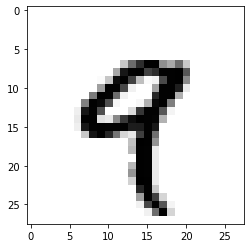

In [5]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [6]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [7]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [8]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [9]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [10]:
my_slice = train_images[:, 14:, 14:]

In [13]:
my_slice.shape

(60000, 14, 14)

In [14]:
my_slice = train_images[:, 7:-7, 7:-7]

In [15]:
my_slice.shape

(60000, 14, 14)

### The notion of data batches

In [16]:
batch = train_images[:128]

In [17]:
batch.shape

(128, 28, 28)

In [18]:
batch = train_images[128:256]

In [19]:
batch.shape

(128, 28, 28)

In [44]:
n = 3
batch = train_images[(128 * n):(128 * (n + 1))]

In [45]:
range_ar =  np.arange(128 * n,128 *(n + 1))
range_ar

array([384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396,
       397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409,
       410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422,
       423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435,
       436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448,
       449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461,
       462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474,
       475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487,
       488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500,
       501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511])

In [49]:
batch_test = train_images[range_ar]

In [50]:
batch_test.shape

(128, 28, 28)

In [51]:
batch.shape

(128, 28, 28)

In [54]:
assert np.array_equal(batch_test, batch)

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [4]:
from tensorflow import keras
keras.layers.Dense(512, activation="relu")

In [16]:
import numpy as np
from tensorflow import keras

# Define a simple model
model = keras.Sequential([
    keras.layers.Dense(512, activation="relu", input_shape=(784,))
])

# Random input data
input_data = np.random.random((5, 784))

# Make predictions using the model
output = model.predict(input_data)

# Print the output
print(output)

[[0.712757   0.9595432  0.43642038 ... 0.         0.         0.        ]
 [0.         0.83443964 0.26095772 ... 0.         0.         0.06094429]
 [0.3399445  0.33973172 0.270755   ... 0.         0.         0.        ]
 [0.2854989  0.47198617 0.62903714 ... 0.         0.         0.        ]
 [0.5745805  0.7758108  0.30120784 ... 0.         0.         0.        ]]


In [33]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

output = model.predict(train_images)
output

array([[6.9180814e-11, 5.9438870e-11, 0.0000000e+00, ..., 1.3157978e-11,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 6.3754370e-11, ..., 2.7228109e-10,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0123673e-10, 0.0000000e+00, ..., 0.0000000e+00,
        6.3219152e-12, 0.0000000e+00],
       ...,
       [0.0000000e+00, 1.4655770e-11, 0.0000000e+00, ..., 0.0000000e+00,
        1.6114877e-11, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.1403385e-10,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 4.1715537e-11, 0.0000000e+00, ..., 8.4879305e-11,
        6.1748301e-11, 0.0000000e+00]], dtype=float32)

In [34]:
output.shape

(60000, 512)

In [35]:
# Define the weight matrix and input data
weights = np.random.rand(784, 512).astype("float32") / 255  # Example weight matrix

# Perform dot product using np.dot()
output = np.dot(train_images, weights)

# Apply ReLU activation
output = np.maximum(output, 0)

# Print the output
print(output)

[[5.4016944e-11 4.8824434e-11 4.2900926e-11 ... 5.3549692e-11
  5.2522833e-11 5.3270496e-11]
 [5.6762942e-11 5.6498677e-11 5.1359455e-11 ... 5.7233805e-11
  5.7543921e-11 5.7041528e-11]
 [3.7372938e-11 3.2706962e-11 3.6842304e-11 ... 3.4918499e-11
  3.4970946e-11 3.6496368e-11]
 ...
 [3.9588600e-11 4.2391042e-11 3.3413324e-11 ... 4.3724545e-11
  4.3311209e-11 4.1972696e-11]
 [3.5903544e-11 3.7503705e-11 3.2766963e-11 ... 3.6482359e-11
  3.8455669e-11 3.7270916e-11]
 [3.8350306e-11 3.9074220e-11 3.5153248e-11 ... 3.8852321e-11
  3.7251414e-11 4.1190058e-11]]


In [36]:
output.shape

(60000, 512)

In [37]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [38]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [39]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [40]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 2.09 s


### Broadcasting

In [0]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [0]:
y = np.expand_dims(y, axis=0)

In [0]:
Y = np.concatenate([y] * 32, axis=0)

In [0]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [0]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

In [0]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [0]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [0]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [0]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [0]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [0]:
train_images = train_images.reshape((60000, 28 * 28))

In [0]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

In [0]:
x = x.reshape((6, 1))
x

In [0]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [0]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [0]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [0]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

## Looking back at our first example

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [0]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [0]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [0]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [0]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [0]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [0]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [0]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [0]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [0]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [0]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [0]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [0]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

### Evaluating the model

In [0]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

## Summary